In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [133]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
Id=test["Id"]
train=train.copy().drop(columns="Id")
test=test.copy().drop(columns="Id")
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## import missingno as msno
Misses Values

In [134]:
import missingno as msno


In [135]:
#msno.bar(train)

In [136]:
#msno.matrix(train);

In [137]:
train["Alley"] = train["Alley"].fillna("None")
train["PoolQC"] = train["PoolQC"].fillna("None")
train["BsmtQual"]=train["BsmtQual"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))# Sayısal değer olarak boş olan lONTfRONTAGE Yİ DOLDURDUK.
for col in ("GarageType","GarageFinish","GarageQual","GarageCond"):
    train[col]=train[col].fillna("None")
for col in ("GarageYrBlt","GarageCars"):
    train[col]=train[col].fillna(0)
for col in ("BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"):
    train[col]=train[col].fillna(0)
for col in ("BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtCond","BsmtQual"):
        train[col]=train[col].fillna("None")
        
train["MasVnrArea"]=train["MasVnrArea"].fillna(0)
train["MasVnrType"]=train["MasVnrType"].fillna("None")
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

train=train.drop(columns="Utilities")
train["Functional"] = train["Functional"].fillna("Typ")
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSSubClass'] = train['MSSubClass'].fillna("None")

<AxesSubplot:>

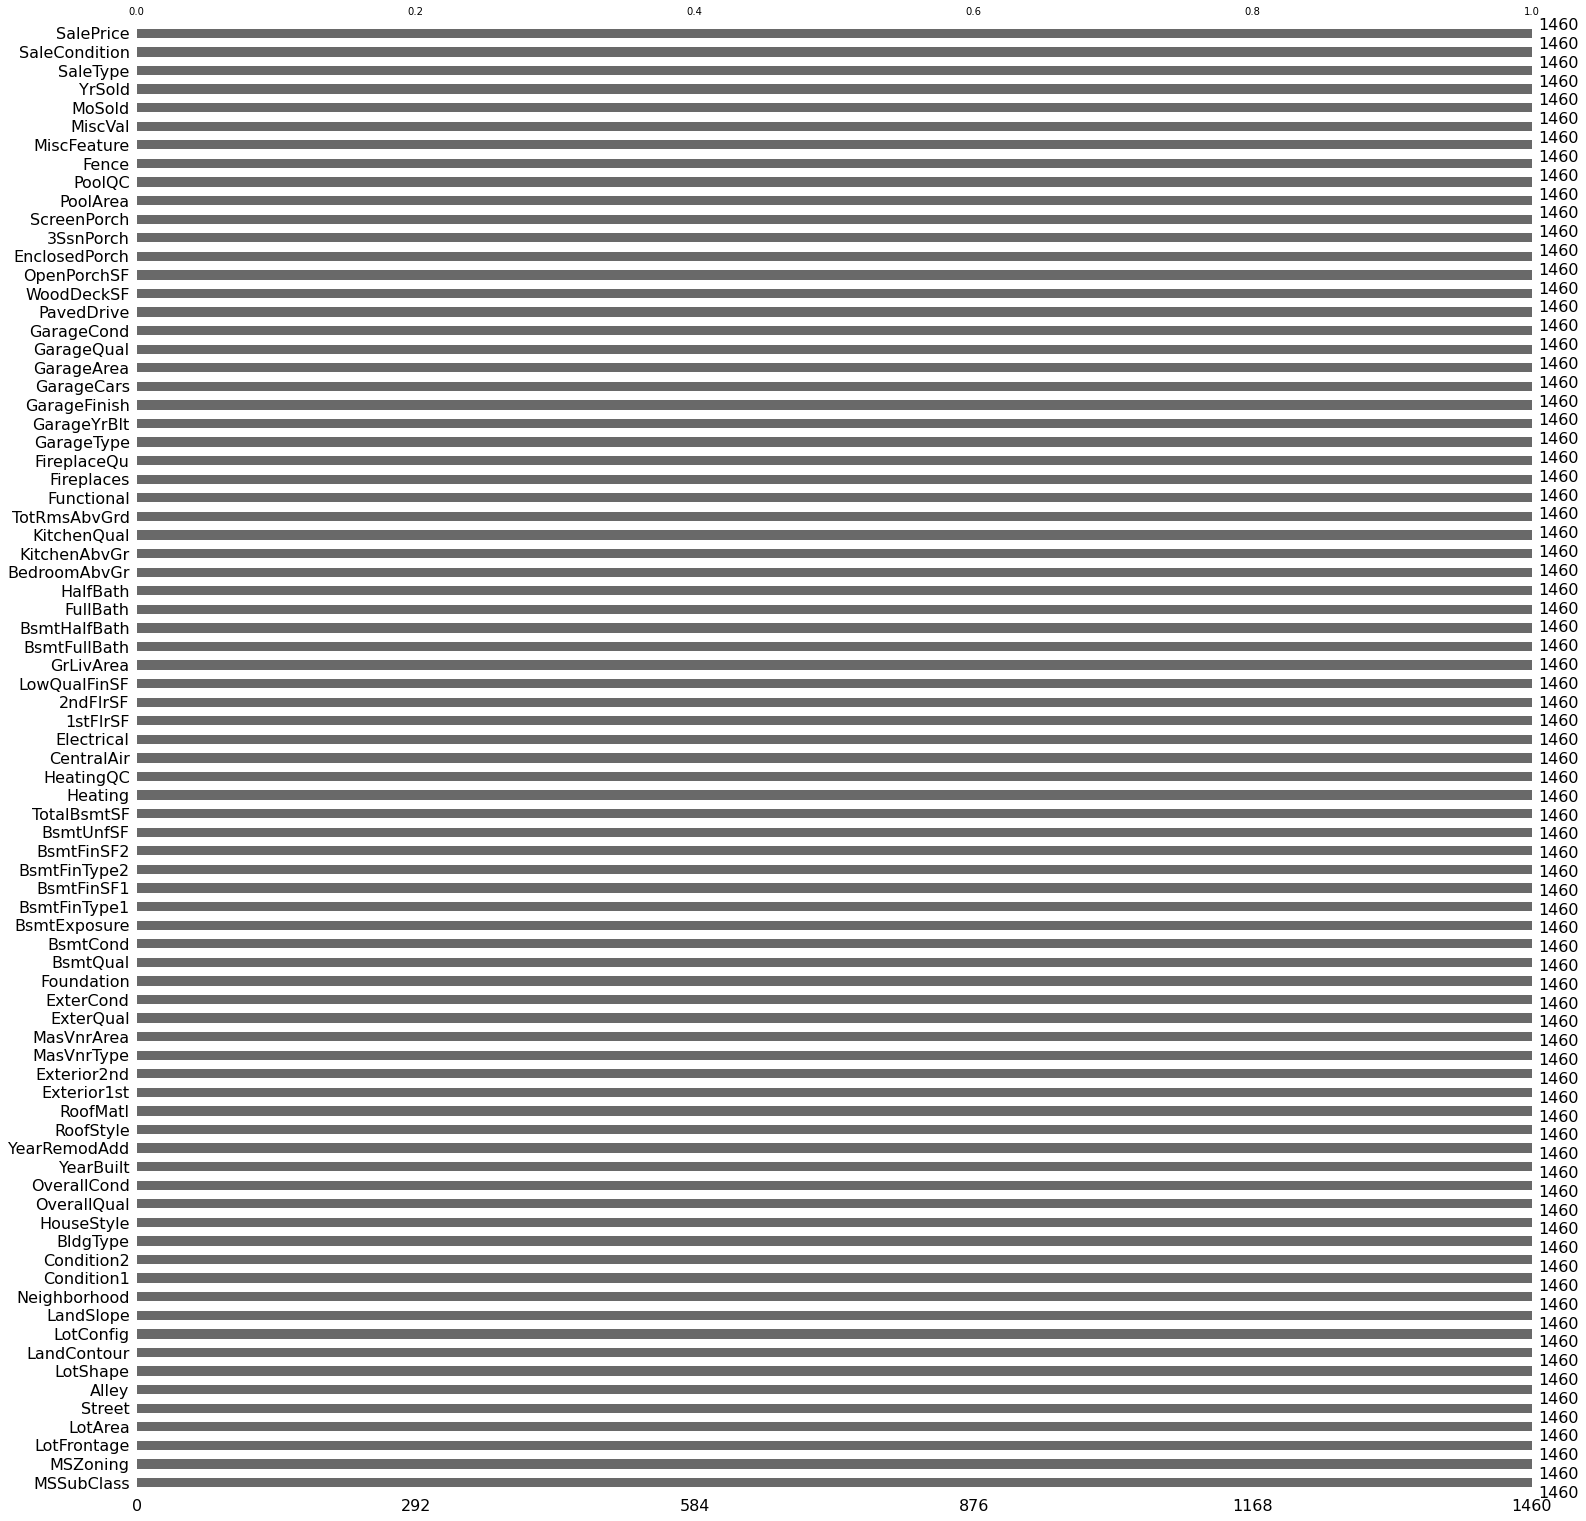

In [138]:
msno.bar(train)

In [139]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [140]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [141]:
from sklearn.preprocessing import LabelEncoder
delete_most_null_df=train.copy().select_dtypes(include=["float64","int64"])
deneme=train.copy().drop(columns=delete_most_null_df.columns)
print(deneme.columns)
# process columns, apply LabelEncoder to categorical features
for c in deneme.columns:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

train.head(5)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')


LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,3,65.0,8450,1,1,3,3,4,0,...,0,3,4,1,0,4,2,8,4,208500
1,4,3,80.0,9600,1,1,3,3,2,0,...,0,3,4,1,0,7,1,8,4,181500
2,9,3,68.0,11250,1,1,0,3,4,0,...,0,3,4,1,0,11,2,8,4,223500
3,10,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,4,0,8,0,140000
4,9,3,84.0,14260,1,1,0,3,2,0,...,0,3,4,1,0,3,2,8,4,250000


In [142]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train=train.copy().drop(columns=["TotalBsmtSF","1stFlrSF","2ndFlrSF"])


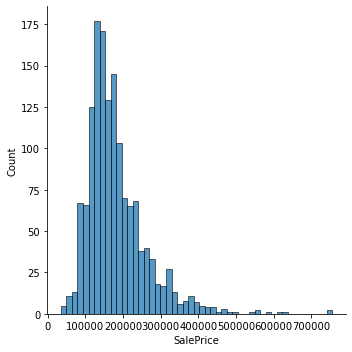

In [143]:
import seaborn as sbn
sbn.displot(train["SalePrice"])


In [144]:
train.corr()["SalePrice"]


MSSubClass       0.054795
MSZoning        -0.166872
LotFrontage      0.346962
LotArea          0.263843
Street           0.041036
                   ...   
YrSold          -0.028923
SaleType        -0.054911
SaleCondition    0.213092
SalePrice        1.000000
TotalSF          0.782260
Name: SalePrice, Length: 77, dtype: float64

In [145]:
train=train.copy().drop(columns=["MSSubClass","Street","YrSold","SaleType","LandSlope","LotConfig","MiscFeature","LandContour","MiscVal","Alley","MoSold"])

In [146]:
train.sort_values("SalePrice",ascending=False)

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleCondition,SalePrice,TotalSF
691,3,104.0,21535,0,15,2,2,0,5,10,...,50,0,0,0,0,3,4,4,755000,6760
1182,3,160.0,15623,0,15,2,2,0,5,10,...,78,0,0,0,555,0,2,0,745000,6872
1169,3,118.0,35760,0,15,2,2,0,5,10,...,76,0,0,0,0,3,4,4,625000,5557
898,3,100.0,12919,0,16,2,2,0,2,9,...,67,0,0,0,0,3,4,5,611657,4694
803,3,107.0,13891,3,16,2,2,0,5,9,...,170,0,0,192,0,3,4,5,582933,4556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,0,50.0,8500,3,9,1,2,0,5,4,...,54,172,0,0,0,3,2,4,40000,1966
533,3,50.0,5000,3,3,2,2,0,2,1,...,0,0,0,0,0,3,4,4,39300,334
968,4,50.0,5925,3,17,2,2,0,0,3,...,0,0,0,0,0,3,1,0,37900,1568
916,0,50.0,9000,3,9,2,2,0,2,2,...,0,0,0,0,0,3,4,0,35311,960


In [147]:
train.sort_values("SalePrice",ascending=True)


,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleCondition,SalePrice,TotalSF
495,0,60.0,7879,3,9,2,2,0,2,4,...,523,115,0,0,0,3,1,0,34900,1440
916,0,50.0,9000,3,9,2,2,0,2,2,...,0,0,0,0,0,3,4,0,35311,960
968,4,50.0,5925,3,17,2,2,0,0,3,...,0,0,0,0,0,3,1,0,37900,1568
533,3,50.0,5000,3,3,2,2,0,2,1,...,0,0,0,0,0,3,4,4,39300,334
30,0,50.0,8500,3,9,1,2,0,5,4,...,54,172,0,0,0,3,2,4,40000,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,3,107.0,13891,3,16,2,2,0,5,9,...,170,0,0,192,0,3,4,5,582933,4556
898,3,100.0,12919,0,16,2,2,0,2,9,...,67,0,0,0,0,3,4,5,611657,4694
1169,3,118.0,35760,0,15,2,2,0,5,10,...,76,0,0,0,0,3,4,4,625000,5557
1182,3,160.0,15623,0,15,2,2,0,5,10,...,78,0,0,0,555,0,2,0,745000,6872


In [148]:
len(train)*0.01

14.6

In [149]:
deletehighvalues=train.sort_values("SalePrice",ascending=False).iloc[15:]

In [150]:
deletehighvalues.describe()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleCondition,SalePrice,TotalSF
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1445.000000,1445.000000,1445.00000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,3.028374,70.458781,10423.696886,1.950865,12.202076,2.033218,2.008304,0.498270,3.029758,6.064360,...,45.923875,22.182007,3.444983,14.537716,2.40346,2.993080,3.503806,3.766090,177082.510035,2541.804152
std,0.634771,22.241082,9929.978538,1.407221,6.019647,0.871369,0.260381,1.203425,1.913960,1.345201,...,65.743845,61.394591,29.467138,54.465975,37.67739,0.117484,1.082865,1.098645,69614.603756,782.663568
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,34900.000000,334.000000
25%,3.000000,60.000000,7500.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,4.000000,4.000000,129900.000000,2006.000000
50%,3.000000,70.083333,9430.000000,3.000000,12.000000,2.000000,2.000000,0.000000,2.000000,6.000000,...,24.000000,0.000000,0.000000,0.000000,0.00000,3.000000,4.000000,4.000000,162000.000000,2464.000000
75%,3.000000,80.000000,11478.000000,3.000000,17.000000,2.000000,2.000000,0.000000,5.000000,7.000000,...,66.000000,0.000000,0.000000,0.000000,0.00000,3.000000,4.000000,4.000000,212000.000000,2988.000000
max,4.000000,313.000000,215245.000000,3.000000,24.000000,8.000000,7.000000,4.000000,7.000000,10.000000,...,547.000000,552.000000,508.000000,480.000000,738.00000,3.000000,4.000000,5.000000,440000.000000,11752.000000


In [151]:
train.describe()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleCondition,SalePrice,TotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.028767,70.725218,10516.828082,1.942466,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,...,46.660274,21.954110,3.409589,15.060959,2.758904,2.991096,3.504795,3.770548,180921.195890,2567.048630
std,0.632017,22.426978,9981.264932,1.409156,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,...,66.256028,61.119149,29.317331,55.757415,40.177307,0.140703,1.082912,1.100854,79442.502883,821.714421
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,334.000000
25%,3.000000,60.000000,7553.500000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,129975.000000,2009.500000
50%,3.000000,70.083333,9478.500000,3.000000,12.000000,2.000000,2.000000,0.000000,2.000000,6.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,163000.000000,2474.000000
75%,3.000000,80.000000,11601.500000,3.000000,17.000000,2.000000,2.000000,0.000000,5.000000,7.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,214000.000000,3004.000000
max,4.000000,313.000000,215245.000000,3.000000,24.000000,8.000000,7.000000,4.000000,7.000000,10.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,3.000000,4.000000,5.000000,755000.000000,11752.000000


In [152]:
deletehighvalues.groupby("YearBuilt").mean()["SalePrice"]

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    111250.000000
            ...      
2006    248544.772727
2007    255362.734694
2008    294149.941176
2009    249076.647059
2010    394432.000000
Name: SalePrice, Length: 112, dtype: float64

In [153]:
old_year_delete=deletehighvalues[deletehighvalues.YearBuilt!=1800]

In [154]:
old_year_delete.describe()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleCondition,SalePrice,TotalSF
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1445.000000,1445.000000,1445.00000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,3.028374,70.458781,10423.696886,1.950865,12.202076,2.033218,2.008304,0.498270,3.029758,6.064360,...,45.923875,22.182007,3.444983,14.537716,2.40346,2.993080,3.503806,3.766090,177082.510035,2541.804152
std,0.634771,22.241082,9929.978538,1.407221,6.019647,0.871369,0.260381,1.203425,1.913960,1.345201,...,65.743845,61.394591,29.467138,54.465975,37.67739,0.117484,1.082865,1.098645,69614.603756,782.663568
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,34900.000000,334.000000
25%,3.000000,60.000000,7500.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,4.000000,4.000000,129900.000000,2006.000000
50%,3.000000,70.083333,9430.000000,3.000000,12.000000,2.000000,2.000000,0.000000,2.000000,6.000000,...,24.000000,0.000000,0.000000,0.000000,0.00000,3.000000,4.000000,4.000000,162000.000000,2464.000000
75%,3.000000,80.000000,11478.000000,3.000000,17.000000,2.000000,2.000000,0.000000,5.000000,7.000000,...,66.000000,0.000000,0.000000,0.000000,0.00000,3.000000,4.000000,4.000000,212000.000000,2988.000000
max,4.000000,313.000000,215245.000000,3.000000,24.000000,8.000000,7.000000,4.000000,7.000000,10.000000,...,547.000000,552.000000,508.000000,480.000000,738.00000,3.000000,4.000000,5.000000,440000.000000,11752.000000


In [155]:
old_year_delete.groupby("GarageYrBlt").count()["SalePrice"]


GarageYrBlt
0.0       81
1900.0     1
1906.0     1
1908.0     1
1910.0     3
          ..
2006.0    58
2007.0    49
2008.0    26
2009.0    17
2010.0     3
Name: SalePrice, Length: 98, dtype: int64

In [156]:
df=old_year_delete[old_year_delete.GarageYrBlt !=1900]

In [157]:
df.describe()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleCondition,SalePrice,TotalSF
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,...,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000
mean,3.030471,70.466024,10425.929363,1.950139,12.198753,2.033241,2.008310,0.497922,3.029086,6.064404,...,45.955679,22.197368,3.447368,14.479224,2.405125,2.993075,3.503463,3.765928,177112.414820,2541.137119
std,0.629963,22.247082,9933.055921,1.407437,6.020406,0.871670,0.260471,1.203769,1.914452,1.345666,...,65.755501,61.413082,29.477207,54.439425,37.690390,0.117525,1.083161,1.099008,69629.435713,782.523733
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,334.000000
25%,3.000000,60.000000,7500.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,129800.000000,2005.750000
50%,3.000000,70.083333,9434.500000,3.000000,12.000000,2.000000,2.000000,0.000000,2.000000,6.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,162000.000000,2464.000000
75%,3.000000,80.000000,11483.500000,3.000000,17.000000,2.000000,2.000000,0.000000,5.000000,7.000000,...,66.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,212000.000000,2988.000000
max,4.000000,313.000000,215245.000000,3.000000,24.000000,8.000000,7.000000,4.000000,7.000000,10.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,3.000000,4.000000,5.000000,440000.000000,11752.000000


In [158]:
y=df["SalePrice"].values

In [159]:
x=df.copy().drop(columns="SalePrice").values


In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [161]:
from sklearn.tree import DecisionTreeRegressor
lin_reg=DecisionTreeRegressor(max_depth=5,random_state=0)
lin_reg.fit(x_train,y_train)
predict_dr=lin_reg.predict(x_test)
len(x_train[0])


DecisionTreeRegressor(max_depth=5, random_state=0)

65

In [162]:
test["Alley"] = test["Alley"].fillna("None")
test["PoolQC"] = test["PoolQC"].fillna("None")
test["BsmtQual"]=test["BsmtQual"].fillna("None")
test["MiscFeature"] = test["MiscFeature"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))# Sayısal değer olarak boş olan lONTfRONTAGE Yİ DOLDURDUK.
for col in ("GarageType","GarageFinish","GarageQual","GarageCond"):
    test[col]=test[col].fillna("None")
for col in ("GarageYrBlt","GarageCars"):
    test[col]=test[col].fillna(0)
for col in ("BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"):
    test[col]=test[col].fillna(0)
for col in ("BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtCond","BsmtQual"):
        test[col]=test[col].fillna("None")
        
test["MasVnrArea"]=test["MasVnrArea"].fillna(0)
test["MasVnrType"]=test["MasVnrType"].fillna("None")
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

test=test.drop(columns="Utilities")
test["Functional"] = test["Functional"].fillna("Typ")
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['MSSubClass'] = test['MSSubClass'].fillna("None")

In [163]:
#MSSubClass=The building class
test['MSSubClass'] = test['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
test['OverallCond'] = test['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [164]:
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test=test.copy().drop(columns=["TotalBsmtSF","1stFlrSF","2ndFlrSF"])


In [165]:
from sklearn.preprocessing import LabelEncoder
delete_most_null_df=test.copy().select_dtypes(include=["float64","int64"])
deneme=test.copy().drop(columns=delete_most_null_df.columns)
print(deneme.columns)
# process columns, apply LabelEncoder to categorical features
for c in deneme.columns:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

test.head(5)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')


LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,5,2,80.0,11622,1,1,3,3,4,0,...,0,2,2,1,0,8,4,8,4,1778.0
1,5,3,81.0,14267,1,1,0,3,0,0,...,0,2,4,0,12500,8,4,8,4,2658.0
2,10,3,74.0,13830,1,1,0,3,4,0,...,0,2,2,1,0,5,4,8,4,2557.0
3,10,3,78.0,9978,1,1,0,3,4,0,...,0,2,4,1,0,8,4,8,4,2530.0
4,0,3,43.0,5005,1,1,0,1,4,0,...,0,2,4,1,0,0,4,8,4,2560.0


In [166]:
test=test.copy().drop(columns=["MSSubClass","Street","YrSold","SaleType","LandSlope","LotConfig","MiscFeature","LandContour","MiscVal","Alley","MoSold"])

In [167]:
test = np.nan_to_num(test)
test=sc.transform(test)
test

array([[-1.6062574 ,  0.39344034,  0.09401872, ..., -1.37409147,
         0.21033261, -0.97014392],
       [-0.04066474,  0.43679737,  0.33726161, ...,  0.45644561,
         0.21033261,  0.14142293],
       [-0.04066474,  0.13329815,  0.29707365, ..., -1.37409147,
         0.21033261,  0.01384537],
       ...,
       [-0.04066474,  3.8620029 ,  0.86448711, ...,  0.45644561,
        -3.4428128 , -0.12383734],
       [-0.04066474, -0.38698624, -0.01458992, ..., -1.37409147,
         0.21033261, -0.83877693],
       [-0.04066474,  0.13329815, -0.08944803, ...,  0.45644561,
         0.21033261,  0.56836565]])

In [125]:
!pip install  lightgbm

In [180]:
from sklearn.model_selection import GridSearchCV

In [188]:
parameters=[{"objective":['regression'],
           "num_leaves":[3,5,7],
           "learning_rate":[0.05,0.02,0.1],
           "n_estimators":[500,720,1000],
           "max_bin" : [55], 
           "bagging_fraction" : [0.8,0.5],
           "bagging_freq" : [3,5,7], 
           "feature_fraction" :[ 0.2319],
           "feature_fraction_seed" :[9],
           "bagging_seed" :[9],
           "min_data_in_leaf" :[6],
           "min_sum_hessian_in_leaf" : [11]}]


In [191]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()
grid=GridSearchCV(estimator=model_lgb,param_grid=parameters,cv=5,n_jobs=1,verbose=0)
grid.fit(x_train,y_train)
print(grid.best_params_)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
             param_grid=[{'bagging_fraction': [0.8, 0.5],
                          'bagging_freq': [3, 5, 7], 'bagging_seed': [9],
                          'feature_fraction': [0.2319],
                          'feature_fraction_seed': [9],
                          'learning_rate': [0.05, 0.02, 0.1], 'max_bin': [55],
                          'min_data_in_leaf': [6],
                          'min_sum_hessian_in_leaf': [11],
                          'n_estimators': [500, 720, 1000],
                          'num_leaves': [3, 5, 7],
                          'objective': ['regression']}])

{'bagging_fraction': 0.8, 'bagging_freq': 3, 'bagging_seed': 9, 'feature_fraction': 0.2319, 'feature_fraction_seed': 9, 'learning_rate': 0.05, 'max_bin': 55, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 11, 'n_estimators': 720, 'num_leaves': 7, 'objective': 'regression'}


In [192]:
model_lgb=lgb.LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=7,
              objective='regression')

In [193]:
model_lgb.fit(x_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=7,
              objective='regression')

In [194]:
predict_xgb=model_lgb.predict(test)

In [195]:
result = pd.DataFrame()
result['Id'] = Id
result['SalePrice'] = predict_xgb
result.to_csv('lgb_2.csv', index=False)